In [61]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_log_error as msle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
df = pd.read_csv("iris_dataset.csv")

In [3]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [25]:
df.shape

(150, 5)

In [6]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

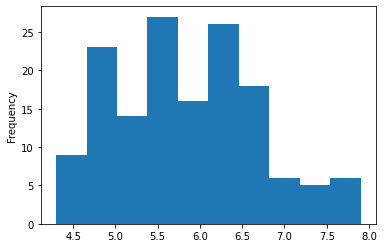

In [8]:
df['sepal.length'].plot.hist()

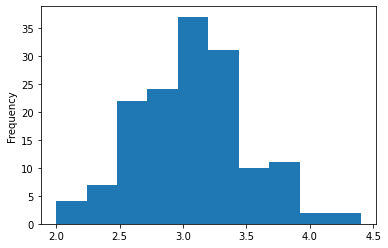

In [10]:
df['sepal.width'].plot.hist()

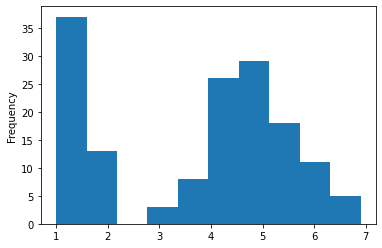

In [11]:
df['petal.length'].plot.hist()

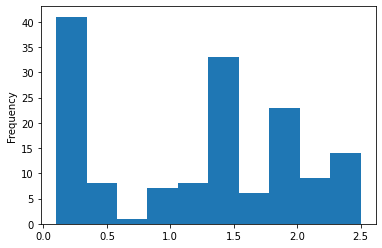

In [12]:
df['petal.width'].plot.hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x21091964128>,
 'caps': [<matplotlib.lines.Line2D at 0x210918efb38>,
 'boxes': [<matplotlib.lines.Line2D at 0x210918e84e0>],
 'medians': [<matplotlib.lines.Line2D at 0x21091942d68>],
 'fliers': [<matplotlib.lines.Line2D at 0x21091616e80>],
 'means': []}

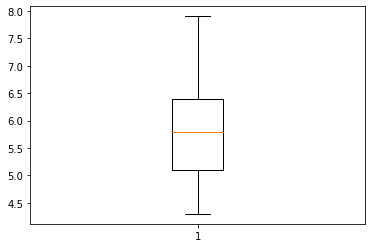

In [20]:
plt.boxplot(df['sepal.length'])

{'whiskers': [<matplotlib.lines.Line2D at 0x21091af2828>,
 'caps': [<matplotlib.lines.Line2D at 0x21091af2f60>,
 'boxes': [<matplotlib.lines.Line2D at 0x21091af26d8>],
 'medians': [<matplotlib.lines.Line2D at 0x21091b236a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21091b23a20>],
 'means': []}

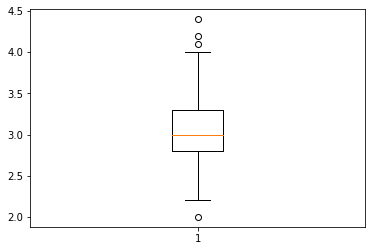

In [21]:
plt.boxplot(df['sepal.width'])

{'whiskers': [<matplotlib.lines.Line2D at 0x21091b765c0>,
 'caps': [<matplotlib.lines.Line2D at 0x21091b76cf8>,
 'boxes': [<matplotlib.lines.Line2D at 0x21091b76470>],
 'medians': [<matplotlib.lines.Line2D at 0x21091b82438>],
 'fliers': [<matplotlib.lines.Line2D at 0x21091b827b8>],
 'means': []}

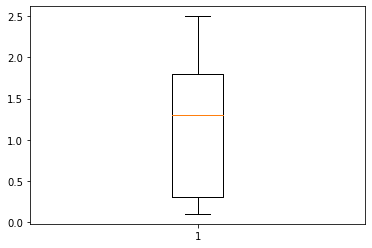

In [22]:
plt.boxplot(df['petal.width'])

{'whiskers': [<matplotlib.lines.Line2D at 0x21091bd8390>,
 'caps': [<matplotlib.lines.Line2D at 0x21091bd8a58>,
 'boxes': [<matplotlib.lines.Line2D at 0x21091bd8240>],
 'medians': [<matplotlib.lines.Line2D at 0x21091be1198>],
 'fliers': [<matplotlib.lines.Line2D at 0x21091be1518>],
 'means': []}

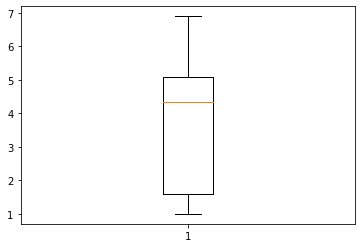

In [23]:
plt.boxplot(df['petal.length'])

In [26]:
df['variety'].value_counts()

Virginica     50
Setosa        50
Versicolor    50
Name: variety, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000210920CFFD0>,
      dtype=object)

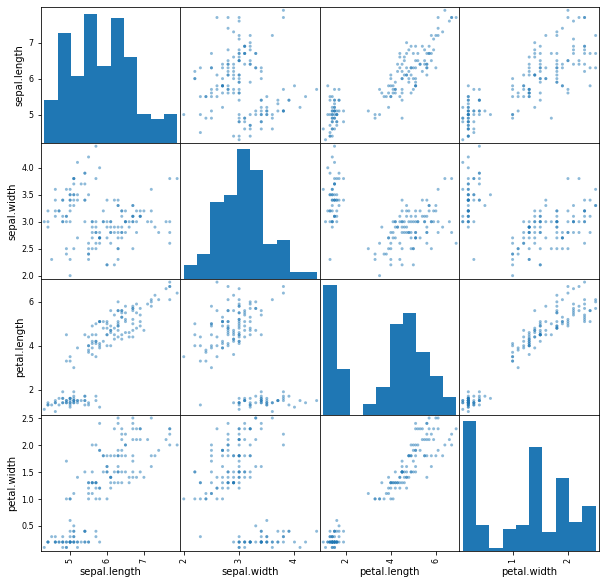

In [32]:
pd.plotting.scatter_matrix(df,figsize=(10,10))

In [45]:
X = df.drop(['variety'], axis = 1)
y = df['variety']

0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: variety, dtype: object

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 1, shuffle = True)

In [56]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.958333 (0.055902)
KNN: 0.950000 (0.055277)
CART: 0.925000 (0.078617)
SVM: 0.966667 (0.040825)


In [57]:
model = SVC(gamma='auto')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [62]:
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9666666666666667
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       0.91      1.00      0.95        10
   Virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

